In [1]:
#%reset
# import packages
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
sns.set()
import re
warnings.filterwarnings('ignore')
from pylab import *
sns.set()
# pip3 install -U scikit-learn scipy matplotlib
def jitter(values,j):
    return values + np.random.normal(j,0.01,values.shape)
from PIL import Image, ImageDraw

In [2]:
# read data preprocessed in knime
df = pd.read_csv('../data/daint-data/data_20220901_toxclass.csv', encoding ='utf8' , engine='python')
df['model'] = df['model'].str.replace(" ", "")
df['fps'] = df['fps'].str.replace("RDkit", "RDKit")
df['fps_class'] = df['fps_class'].str.replace("RDkit", "RDKit")
df = df.drop(df[df['model'] == "NaiveBayes"].index)
df.rename(columns = {'sample':'subsampling', 'resample':'resampling'}, inplace = True)
vals_to_replace = {'rf':'tree', 'CSimca' :'simca', 'kernelpls':'pls', 'kknn':'knn', 'RRF':'tree', 'RandomForest':'tree', 
          'DecisionTree':'tree', 'adaboost':'boost-tree', 'AdaBag':'boost-tree', 'bayesglm':'linear', 'GeneralizedLinearModel(H2O)':'linear',
          'glmStepAIC':'linear', 'LogisticRegression':'linear', 'regLogistic':'linear', 'deepboost':'boost-tree', 'GradientBoostedTrees':'boost-tree',
          'XGBoostTrees':'xboost-tree', 'xgbTree':'xboost-tree', 'DeepLearning(Keras)':'deep', 'NeuralNetwork':'deep', 'pcaNNet':'deep',
          'glmnet':'deep', 'nnet':'deep', 'avNNet':'deep', 'svmPoly':'svm', 'gaussprRadial':'svm','svmRadialCost':'svm','svmRadialCost':'gaussian', 'gbm':'boost-tree'}
df['model'] = df['model'].map(vals_to_replace)

# add class info
df_class = pd.read_csv('../data/tox21-data/class_endpoint_mechtarget_reftable.csv', encoding ='utf8' , engine='python')
df_class.rename(columns = {'class_id':'class'}, inplace = True)
df_class['class'] = df_class['class'].str.replace("_", "")
df_class = df_class[['mechanisticTargets', 'mechT', 'class']]
df = pd.merge(df, df_class, on='class')
#df['mechT'] = df['mechT'].str.replace(" ", "")

df['mechT'] = df['mechT'].str.replace("GER Steroid Hormone Nuclear Rec.", "Steroid Hormone Rec.")
df['mechT'] = df['mechT'].str.replace("Gamma-Aminobutyric Acid Sign. Path.", "Aminobutyric Acid Path.")
df['mechT'] = df['mechT'].str.replace("CC-GER Fatty Acid Signaling", "Fatty Acid Signaling")
df['mechT'] = df['mechT'].str.replace("GER Developmental Sign.", "GER Dev. Sign.")
df['mechT'] = df['mechT'].str.replace("GER Glucocorticoid Met. Proc.", "Glucocorticoid Met. Proc.")

# create groups of data
df_daint = df[df['source'] == "daint"]
df_knime_oob= df[df['source'] == "knime-oob"]
df_knime_fb= df[df['source'] == "knime-fb"]
frames = [df_daint, df_knime_oob]
dff = pd.concat(frames)

df_class_metric = pd.read_csv('../data/tox21-data/hits_per_class.csv', encoding ='utf8' , engine='python')
dfff = pd.merge(df_knime_oob, df_class_metric, on='class')
dfff['perc-hit'] = dfff.hitc_active/dfff.DTXSID_count*100

In [3]:
df_class_metric = pd.read_csv('../data/tox21-data/hits_per_class.csv', encoding ='utf8' , engine='python')
dfff = pd.merge(df_knime_oob, df_class_metric, on='class')
dfff['perc-hit'] = dfff.hitc_active/dfff.DTXSID_count*100
dfff = dfff.groupby('mechT', as_index = False).mean()
dfff.head()

mechT  sensitivity  specificity  precision     F  \
0     ACh Rec. Sign. Path.         0.30         0.83       0.35  0.68   
1          Abnormal Growth         0.25         0.94       0.71  0.58   
2      Adenosine Rec. Act.         0.55         0.84       0.79  0.62   
3  Aminobutyric Acid Path.         0.15         0.96       0.55  0.65   
4      Androgen Met. Proc.         0.52         0.94       0.82  0.66   

   accuracy  cohen  DTXSID_count  hitc_active  perc-hit  
0      0.57   0.13        122.00        34.00     27.87  
1      0.59   0.18        326.33        51.27     17.22  
2      0.70   0.39        149.00        42.00     28.19  
3      0.56   0.11        144.00        16.00     11.11  
4      0.73   0.45       3526.00       403.37     12.12

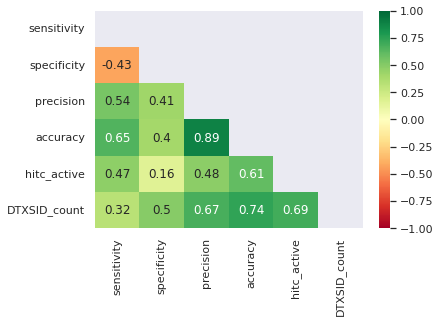

In [7]:
df_corr = dfff[['sensitivity', 'specificity', 'precision', 'accuracy', 'hitc_active', 'DTXSID_count']]
corr = df_corr.corr()
matrix = mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='RdYlGn', mask=matrix)
plt.savefig('../plots/knime/correlation_of_metrics.svg', bbox_inches = 'tight')

In [94]:
dff_assay_max.mechT.unique()

array(['ACh Rec. Sign. Path.', 'Abnormal Growth', 'Adenosine Rec. Act.',
       'Aminobutyric Acid Path.', 'Androgen Met. Proc.',
       'Angiogenic Proc.', 'Aromatase Act.', 'CC-GER Dev. Sign.',
       'CC-GER Inflammatory Resp.', 'CC-GER Oxidative Stress',
       'CC-GER Transcription Fact.', 'Cell Cycle', 'Cell Proliferation',
       'Cell Viability Proc.', 'Cholesterol Transp.', 'Coagulation Proc.',
       'DNA Damage', 'Dopamine Rec. Sign. Path.', 'Energy Met. Proc.',
       'Estrogen Met. Proc.', 'Extracellular Matrix',
       'Fatty Acid Signaling', 'GER Dev. Sign.',
       'GER Estrogen Met. Proc.', 'GER Fatty Acid Sign.',
       'GER Inflammatory Resp.', 'GER Oxidative Stress',
       'GER Progesterone Met. Proc.', 'GER Thyroid Rec. Sign.',
       'GER Transcription Factors', 'GER Xenobiotic Resp.',
       'GER p53 Sign. Path.', 'Glucocorticoid Met. Proc.',
       'Histone Modification', 'Inflammatory Resp.', 'Ion Channel Act.',
       'Monoamine Oxidase Act.', 'Neurotransmiss

mechT cyto  sensitivity  specificity  precision     F  \
0  Androgen Met. Proc.   no         0.96         0.99       0.99  0.98   
1  Androgen Met. Proc.  yes         0.98         1.00       1.00  0.99   
2     Angiogenic Proc.   no         0.74         1.00       0.85  0.79   
3     Angiogenic Proc.  yes         0.87         0.97       0.97  0.91   
4       Aromatase Act.   no         0.88         0.98       0.98  0.93   

      class  fps        model subsampling  resampling     source  \
0  class894  CSI  xboost-tree       smote  repeatedcv  knime-oob   
1  class894  CSI  xboost-tree       smote  repeatedcv  knime-oob   
2  class530  CSI  xboost-tree       smote  repeatedcv  knime-oob   
3  class508  CSI  xboost-tree       smote  repeatedcv  knime-oob   
4  class640  CSI  xboost-tree       smote  repeatedcv  knime-oob   

  sampling_independent  accuracy  cohen fps_class  \
0                  yes      0.98   0.95       CSI   
1                  yes      0.99   0.97       CSI   
2                  yes      0.80   0.61       CSI   
3                  yes      0.91   0.82       CSI   
4                  yes      0.93   0.86       CSI   

                                  mechanisticTargets metric  
0  Androgen Metabolic Process,Gene Expression Reg...    max  
1  Androgen Metabolic Process,Gene Expression Reg...    max  
2           Angiogenic Process,Inflammatory Response    max  
3           Angiogenic Process,Inflammatory Response    max  
4                                 Aromatase Activity    max

In [25]:
df['fps'].unique()
df.columns
df_cdk = df[df['fps_class'] == "CDK"]
df_cdk.shape
dff_mechT_mean.head(3)

mechT fps_class   model cyto  sensitivity  specificity  \
0  ACh Rec. Sign. Path.       CDK    deep  yes         0.21         0.71   
1  ACh Rec. Sign. Path.       CDK  linear  yes         0.41         0.84   
2  ACh Rec. Sign. Path.       CDK    tree  yes         0.78         0.88   

   precision     F  accuracy  cohen  
0       0.24  0.83      0.46  -0.08  
1       0.41  0.71      0.62   0.25  
2       0.86  0.81      0.83   0.66

In [ ]:
print(df['model'].unique())
print(df['subsampling'].unique())
print(df['resampling'].unique())
print(df['fps'].unique())
print(df['fps_class'].unique())
print(df['class'].unique())
print(df.columns)
print(df.size)
print(df.info)
print(df.shape)
print(df.head)
print(df.dtypes)
df_daint.describe()
print(df['model'].unique())

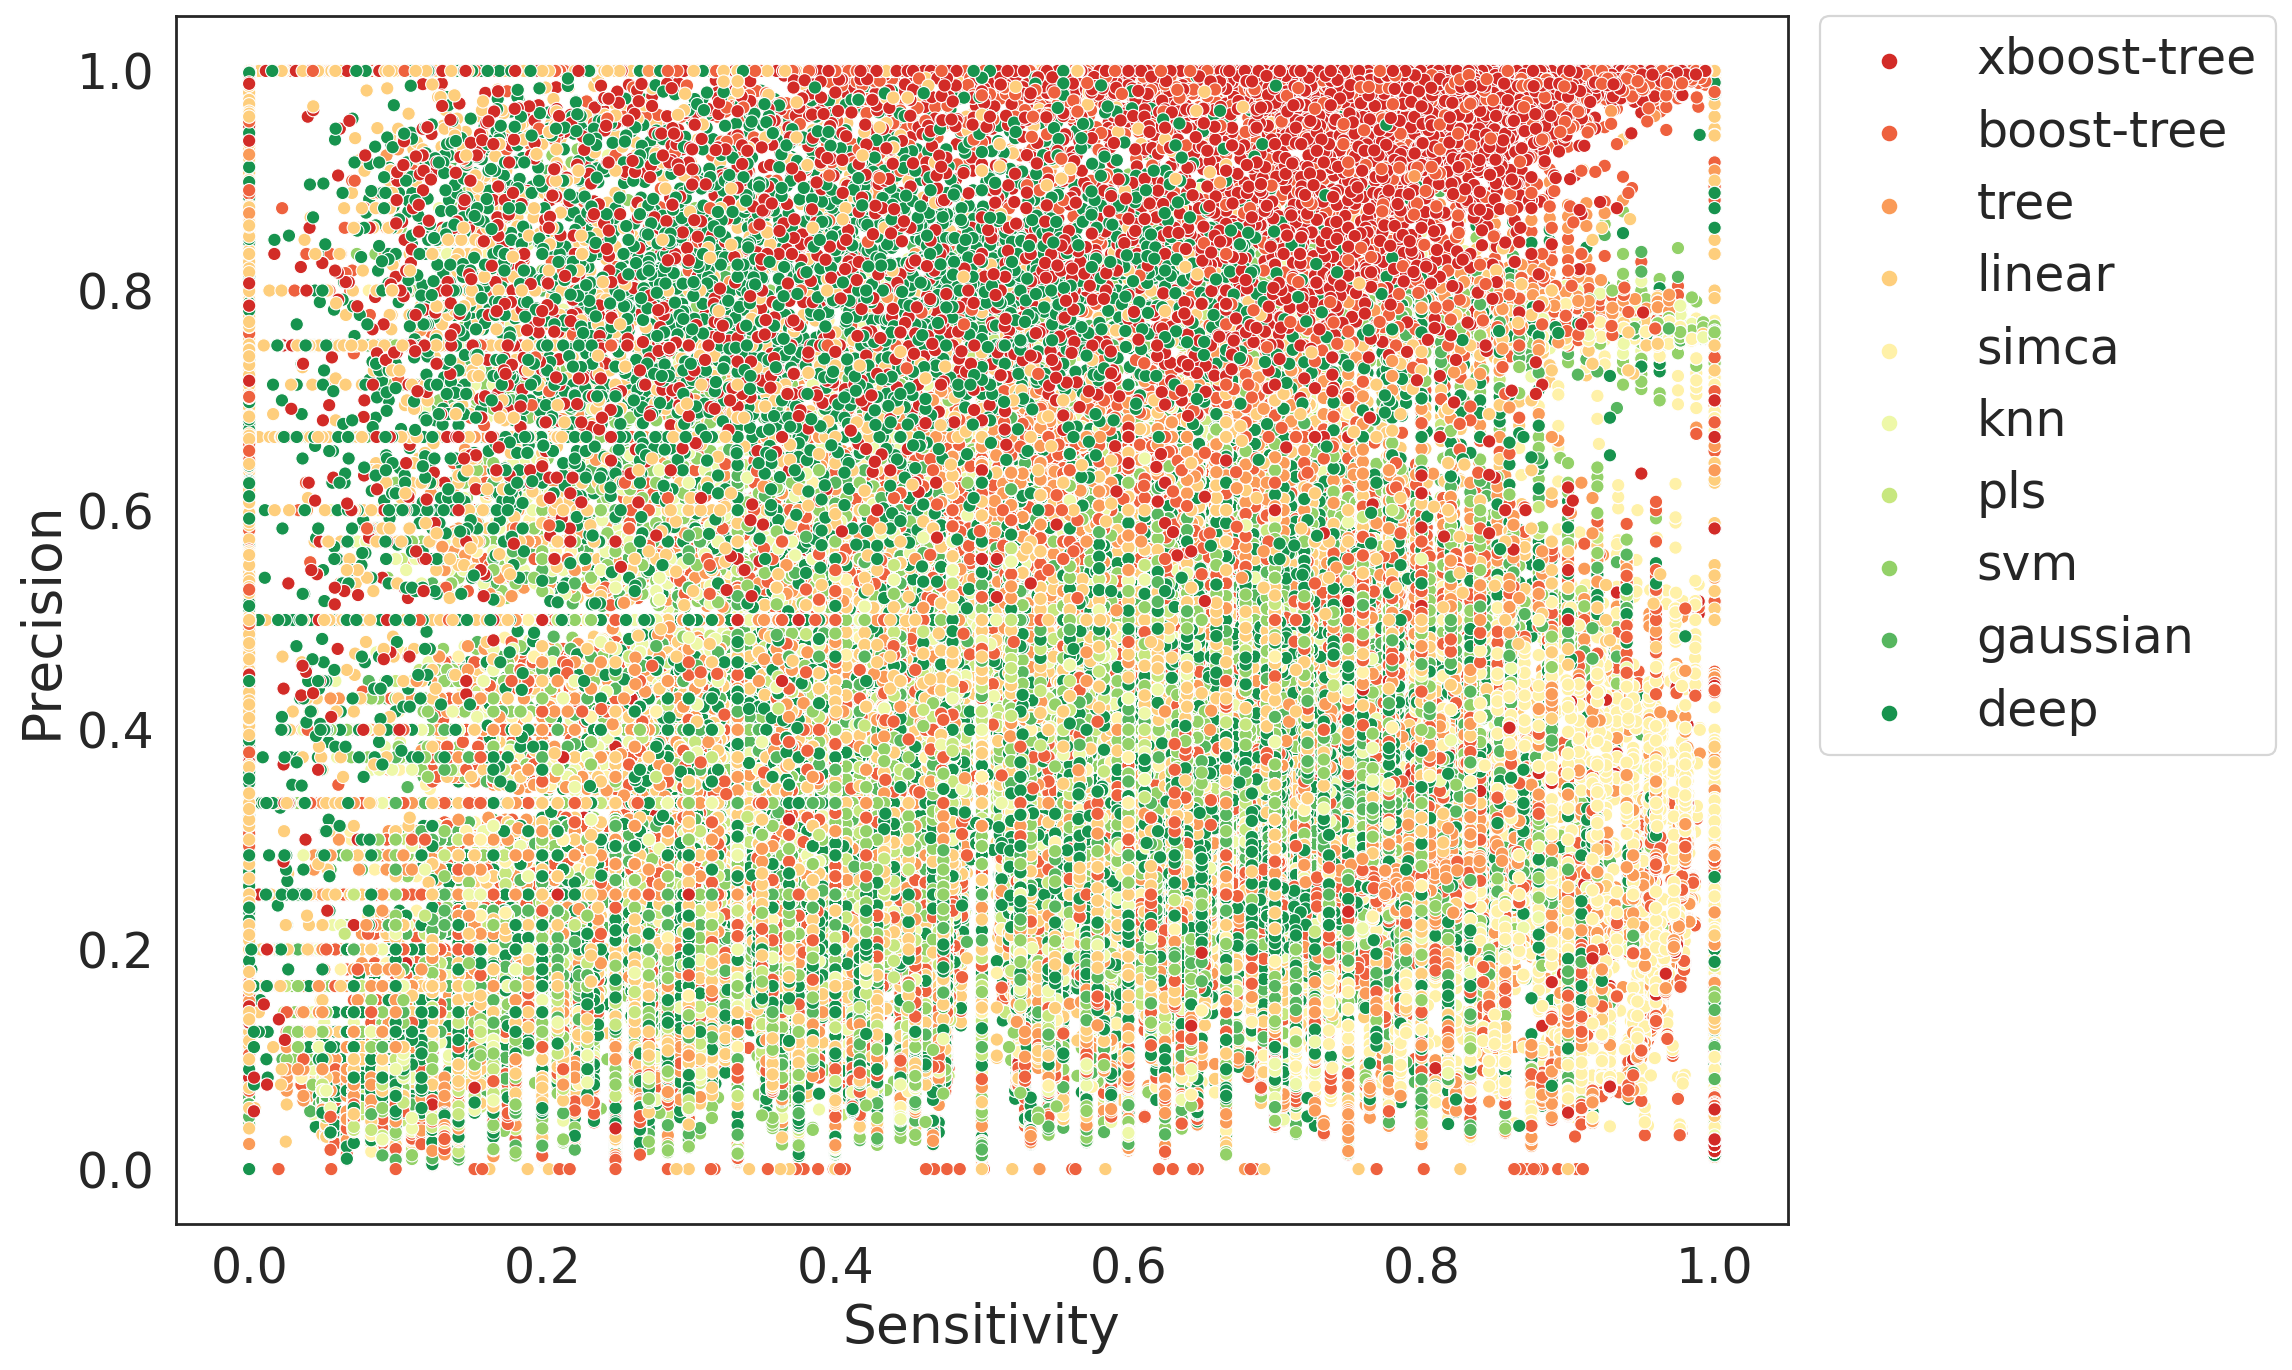

In [10]:
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(20,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.size' : 22}
plt.rcParams.update(rc)
plt.figure(figsize=(13,10), dpi= 80)
sns.set_style("white")
hue_order =['xboost-tree','boost-tree','tree', 'linear', 'simca', 'knn', 'pls', 'svm','gaussian', 'deep']

ax = sns.scatterplot(data=dff, x="sensitivity", y="precision",
                hue="model", palette="RdYlGn", 
               hue_order=hue_order, linewidth=0.5, alpha = 1)
handles, labels  =  ax.get_legend_handles_labels() 
ax.set_title('')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
ax.set(xlabel='Sensitivity', ylabel='Precision')
plt.savefig('../plots/knime/scatter_allpoints_sensitivity-vs-precision_hue-model.png', bbox_inches = 'tight')

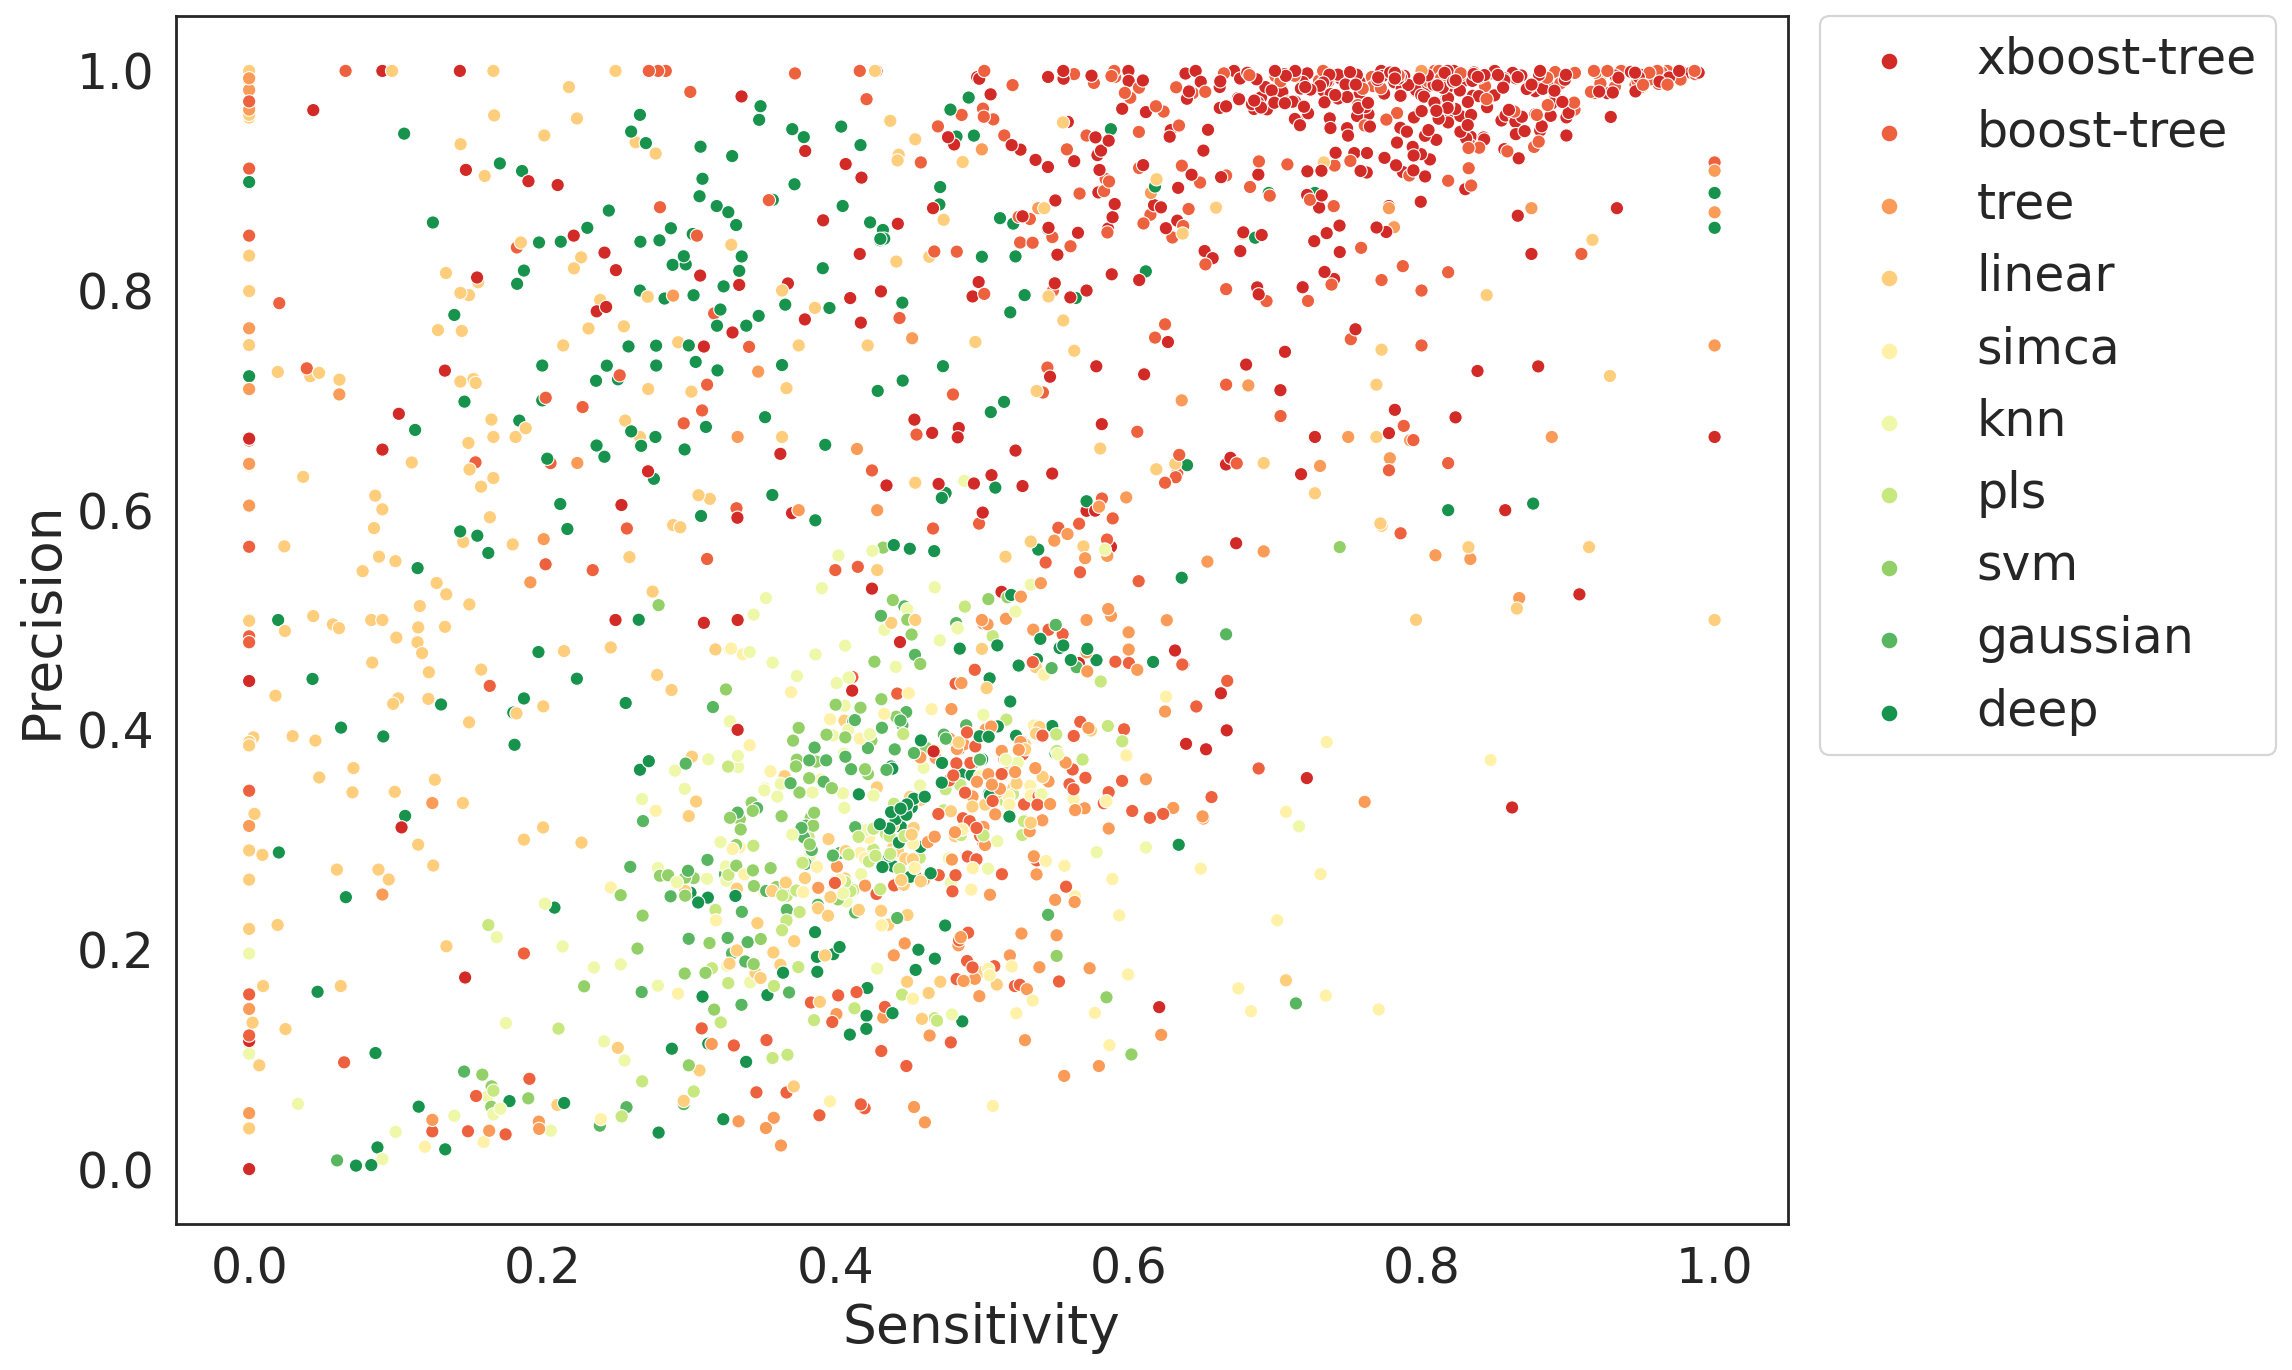

In [17]:
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(20,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.size' : 22}
plt.rcParams.update(rc)
plt.figure(figsize=(13,10), dpi= 80)
sns.set_style("white")
hue_order =['xboost-tree','boost-tree','tree', 'linear', 'simca', 'knn', 'pls', 'svm','gaussian', 'deep']

ax = sns.scatterplot(data=dff_mechT_mean, x="sensitivity", y="precision",
                hue="model", palette="RdYlGn", 
               hue_order=hue_order, linewidth=0.5, alpha = 1)
handles, labels  =  ax.get_legend_handles_labels() 
ax.set_title('')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
ax.set(xlabel='Sensitivity', ylabel='Precision')
plt.savefig('../plots/knime/scatter_permechtarget_sensitivity-vs-precision_hue-model.png', bbox_inches = 'tight')

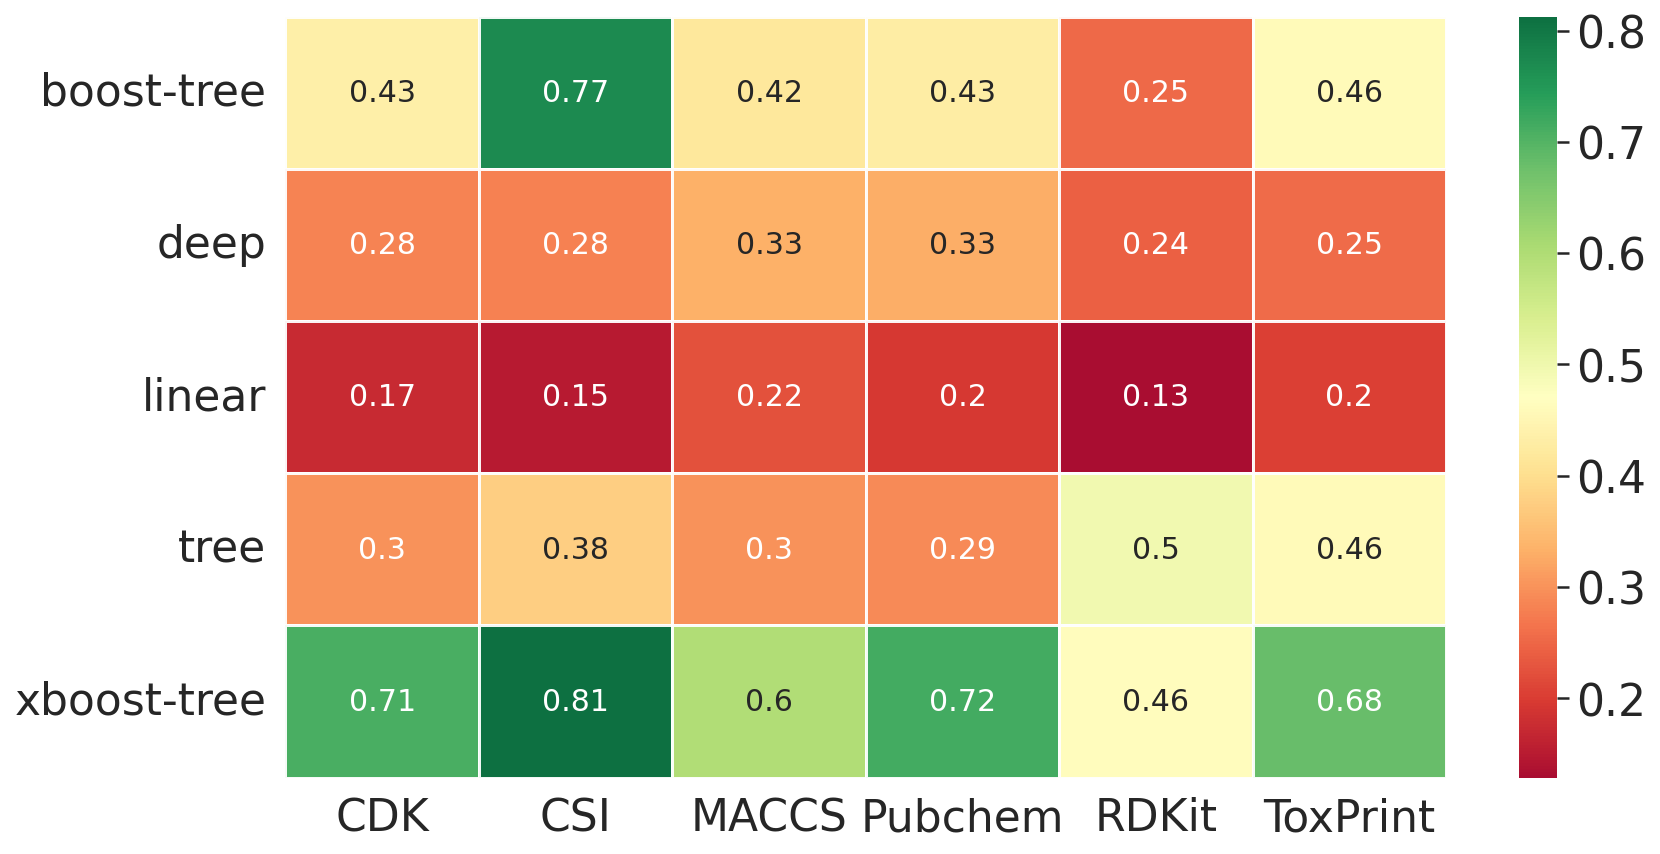

In [66]:
# for the heatmap we present just a subset from knime results. CSI fps were not tested on daint. 
%config InlineBackend.figure_format = 'retina'
df_sel = df_knime_oob[["sensitivity", "model", "fps_class"]]
df_sel_avg = df_sel.groupby(["model", "fps_class"], as_index=False).mean('sensitivity')
sorter = ["linear, ""deep", "tree", "boots-tree", "xboost-tree"]
df_sel_avg = df_sel_avg.reindex(sorter)
counts = df_sel.groupby(['model','fps_class']).size().reset_index().rename(columns={0:'count'})
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.heatmap(df_sel_avg_piv, cmap="RdYlGn", alpha = 0.95, linewidths=0.70, linecolor='white', annot=True,  fmt='.2g')
plt.xlabel('')
plt.ylabel('')

#RdYlGn
#PiYG
plt.savefig('../plots/knime/heatmap_model-vs-molfps_meansensitivity.png', bbox_inches = 'tight')

In [59]:
df_sel.head(20)

sensitivity        model fps_class
8292          0.0  xboost-tree       CDK
8293          0.0  xboost-tree       CDK
8294          0.0  xboost-tree       CDK
8295          0.0  xboost-tree       CDK
8296          0.0       linear       CDK
8297          0.0       linear       CDK
8298          0.0       linear       CDK
8299          0.0       linear       CDK
8300          0.0   boost-tree     RDKit
8301          0.0   boost-tree     RDKit
8302          0.0  xboost-tree     RDKit
8303          0.0  xboost-tree     RDKit
8304          0.0       linear       CDK
8305          0.0       linear       CDK
8306          0.0       linear     RDKit
8307          0.0       linear     RDKit
8308          0.0  xboost-tree       CDK
8309          0.0  xboost-tree       CDK
8310          0.0   boost-tree     RDKit
8311          0.0   boost-tree     RDKit

In [ ]:
# for the heatmap we present just a subset from knime results. CSI fps were not tested on daint. 
%config InlineBackend.figure_format = 'retina'
df_sel = df_con[["sensitivity", "model", "fps_class"]]
df_sel_avg = df_sel.groupby(["model", "fps_class"], as_index=False).mean('sensitivity')
df_sel_avg_piv = df_sel_avg.pivot("model", "fps_class", "sensitivity")
ax = sns.heatmap(df_sel_avg_piv, cmap="RdYlGn")
#RdYlGn
#PiYG
plt.savefig('../plots/knime/heatmap_model-vs-molfps_meansensitivity.png', bbox_inches = 'tight')

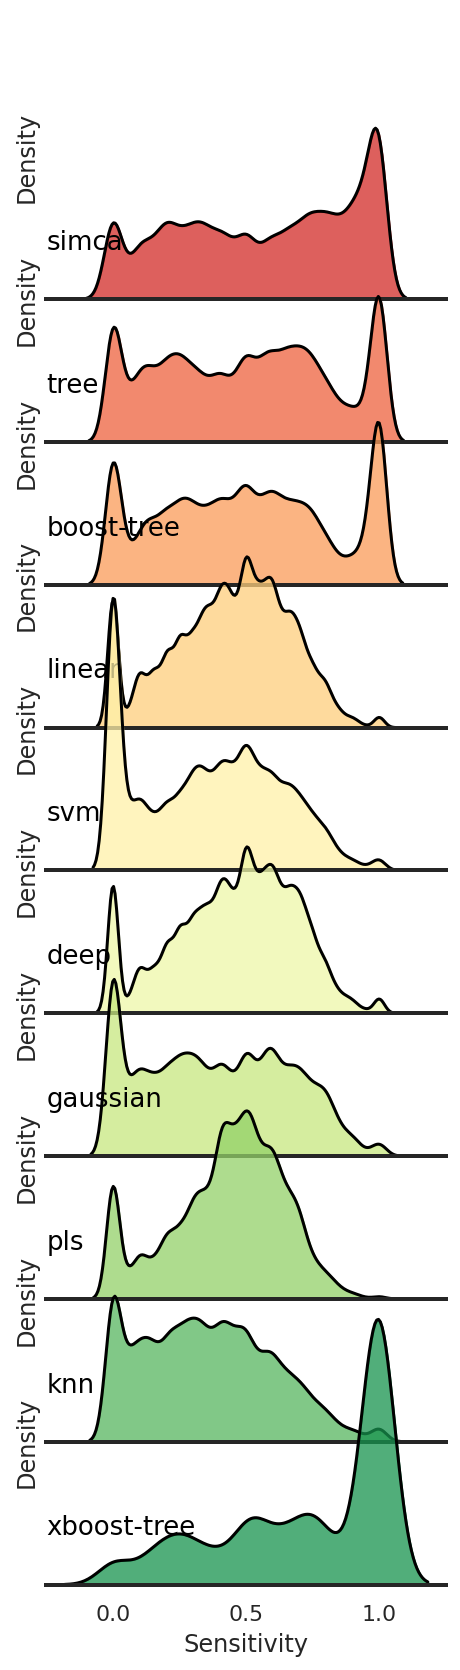

In [46]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 10)
g = sns.FacetGrid(df_daint, palette=palette, row="model", hue="model", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "model")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_daint_model_ridge.svg', bbox_inches = 'tight', dpi=300)

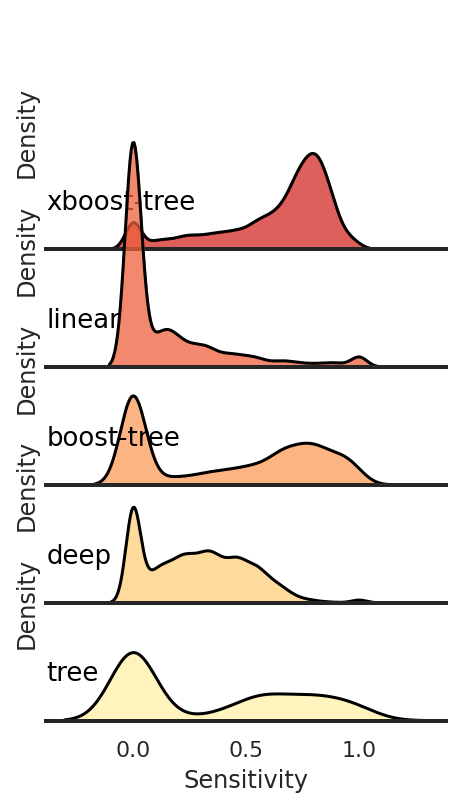

In [47]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 10)
g = sns.FacetGrid(df_knime_oob, palette=palette, row="model", hue="model", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "model")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_knieoob_model_ridge.svg', bbox_inches = 'tight', dpi=300)

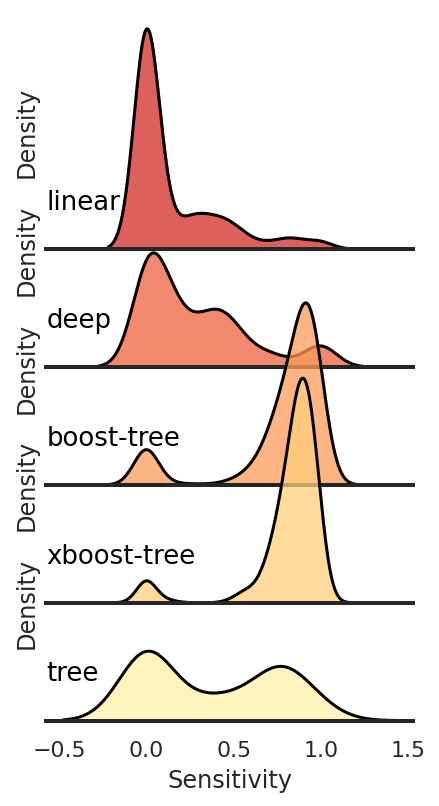

In [48]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 10)
g = sns.FacetGrid(df_csi, palette=palette, row="model", hue="model", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "model")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_csi_model_ridge.svg', bbox_inches = 'tight', dpi=300)

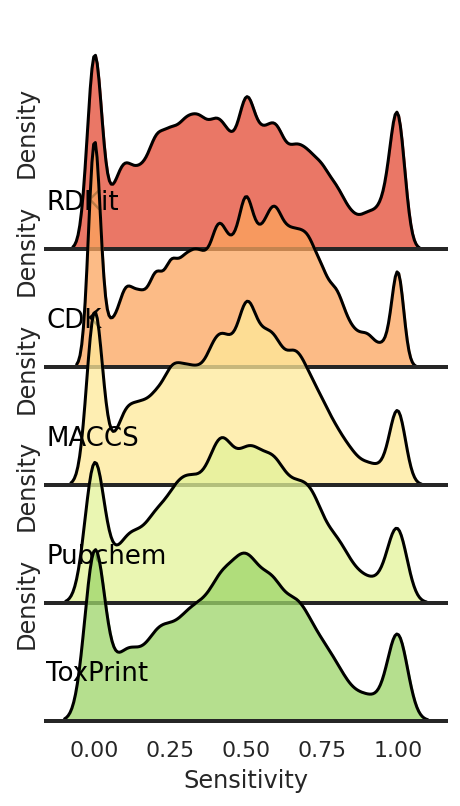

In [49]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 6)
g = sns.FacetGrid(df_daint, palette=palette, row="fps_class", hue="fps_class", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "fps_class")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_daint_fps_ridge.svg', bbox_inches = 'tight', dpi=300)

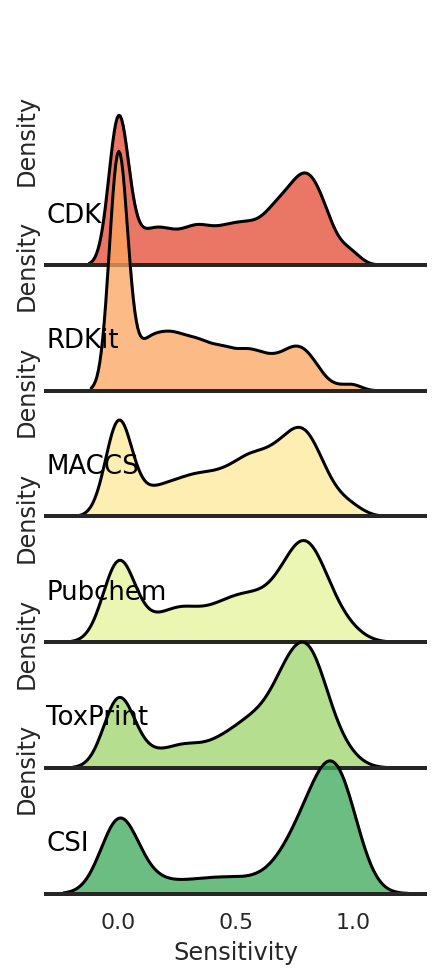

In [50]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 6)
g = sns.FacetGrid(df_knime_oob, palette=palette, row="fps_class", hue="fps_class", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "fps_class")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_knimeoob_fps_ridge.svg', bbox_inches = 'tight', dpi=300)

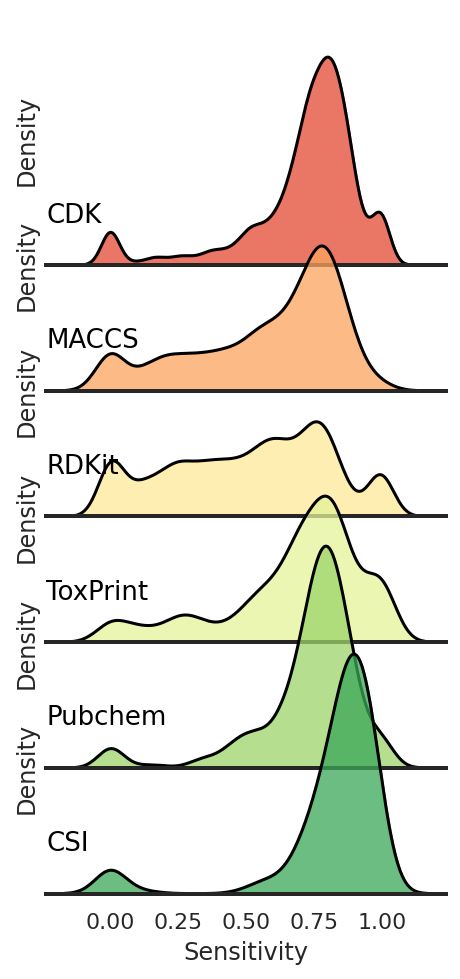

In [51]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 6)
g = sns.FacetGrid(df_xboost, palette=palette, row="fps_class", hue="fps_class", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "fps_class")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_xgb_model_ridge.svg', bbox_inches = 'tight', dpi=300)

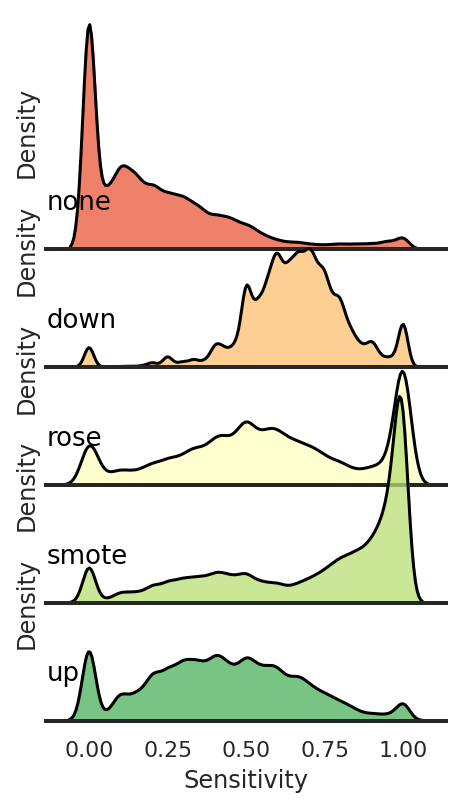

In [52]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 5)
g = sns.FacetGrid(df, palette=palette, row="subsampling", hue="subsampling", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "subsampling")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_subsampling_daint_ridge.svg', bbox_inches = 'tight', dpi=300)

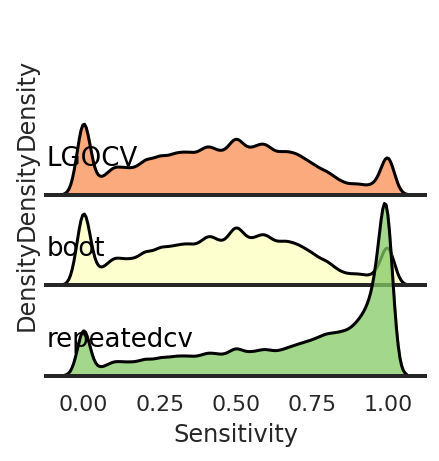

In [53]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 3)
g = sns.FacetGrid(df, palette=palette, row="resampling", hue="resampling", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "resampling")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_resampling_ridge.svg', bbox_inches = 'tight', dpi=300)

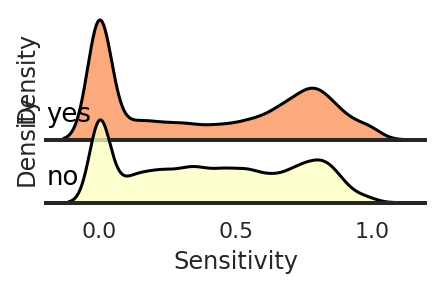

In [54]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 3)
g = sns.FacetGrid(df_knime_oob, palette=palette, row="cyto", hue="cyto", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "cyto")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_knimeoob_cyto_ridge.svg', bbox_inches = 'tight', dpi=300)

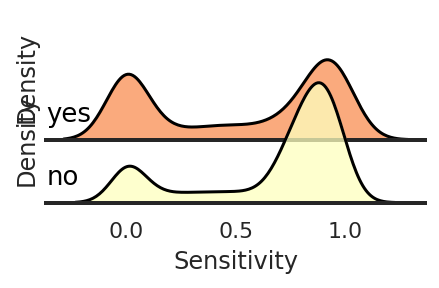

In [101]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 3)
g = sns.FacetGrid(df_csi, palette=palette, row="cyto", hue="cyto", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "cyto")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_cyto_csi_ridge.svg', bbox_inches = 'tight', dpi=300)

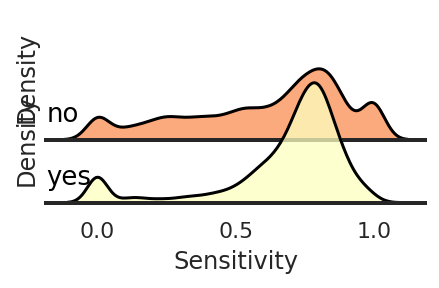

In [100]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("RdYlGn", 3)
g = sns.FacetGrid(df_xboost, palette=palette, row="cyto", hue="cyto", aspect=3, height=1.2)
g.map_dataframe(sns.kdeplot, x="sensitivity", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="sensitivity", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "cyto")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Sensitivity")
g.despine(left=True)
#plt.suptitle('ML performance by model', y=0.98)
plt.savefig('../plots/knime/kde_sensitivity_cyto_xboost_ridge.svg', bbox_inches = 'tight', dpi=300)

In [32]:
dff_mechT_mean.head()
dff_mechT_mean.columns

Index(['mechT', 'fps_class', 'model', 'cyto', 'sensitivity', 'specificity',
       'precision', 'F', 'accuracy', 'cohen'],
      dtype='object')